In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

<font color=black size=5 face=雅黑>**使用scikit-learn中的回归问题**</font>

In [34]:
boston=datasets.load_boston()

In [35]:
X=boston.data
y=boston.target
X=X[y<np.max(y)]
y=y[y<np.max(y)]

In [37]:
X.shape

(490, 13)

In [38]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [39]:
from sklearn.linear_model import LinearRegression
mreg=LinearRegression()
mreg.fit(X_train,y_train)

LinearRegression()

In [43]:
y_predict=mreg.predict(X_test)

In [44]:
mreg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [45]:
mreg.intercept_

34.117399723229845

In [50]:
#线性回归得到的score和r2_score都是R squared
mreg.score(X_test,y_test)

0.8129794056212809

In [51]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predict)

0.8129794056212809

<font color=black size=5 face=雅黑>**更多关于线性回归模型的讨论**</font>

In [80]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [85]:
yy=lin_reg.coef_
yy

array([-1.06715912e-01,  3.53133180e-02, -4.38830943e-02,  4.52209315e-01,
       -1.23981083e+01,  3.75945346e+00, -2.36790549e-02, -1.21096549e+00,
        2.51301879e-01, -1.37774382e-02, -8.38180086e-01,  7.85316354e-03,
       -3.50107918e-01])

In [82]:
np.argsort(lin_reg.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5])

In [86]:
xx=boston.feature_names[np.argsort(lin_reg.coef_)]
xx

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

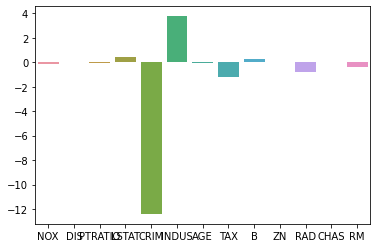

In [84]:
import seaborn as sns
sns.barplot(x=xx,y=yy)

<font color=black >**线性回归总结：**</font>

<font color=black >**典型的参数学习**</font>

<font color=black >**对数据有假设：线性**</font>

<font color=black >**优点：对数据具有强解释性**</font>

<font color=black size=5 face=雅黑>**KNN Regressor**</font>

In [90]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg=KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
knn_reg.score(X_test,y_test)

0.5865412198300899

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }    
]

knn_reg=KNeighborsRegressor()
grid_search=GridSearchCV(knn_reg,param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [58]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [59]:
#网格搜索采用了交叉验证，所以这里不是实际意义上的score
grid_search.best_score_

0.652216494152461

In [62]:
#用网格搜索得到的KNN模型再进行预测得到的score才是可以进行比较的，R squared
grid_search.best_estimator_.score(X_test,y_test)

0.7160666820548707